In [27]:
import pandas as pd
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib import gridspec
import matplotlib as mpl
mpl.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = [8.27, 11.69]
# mpl.style.available

In [28]:
Lmin = 2
Lmax = 22
WINDOW_SIZE = 5
PUP_SIZE_SCALE = 0.004 * 0.2
results = join('..', 'results', 'results_review')

# Relational options on correctness

In [29]:
### DATA LOADING
corr_lev_easy = pd.read_csv(join(results, 'dynamics_LEV_EASY_CORR.csv'))
corr_lev_med = pd.read_csv(join(results, 'dynamics_LEV_MED_CORR.csv'))
corr_lev_hard = pd.read_csv(join(results, 'dynamics_LEV_HARD_CORR.csv'))

err_lev_easy = pd.read_csv(join(results, 'dynamics_LEV_EASY_ERR.csv'))
err_lev_med = pd.read_csv(join(results, 'dynamics_LEV_MED_ERR.csv'))
err_lev_hard = pd.read_csv(join(results, 'dynamics_LEV_HARD_ERR.csv'))

full_wmc_low = pd.read_csv(join(results, 'dynamics_WMC_LOW_FULL.csv'))
full_wmc_med = pd.read_csv(join(results, 'dynamics_WMC_MED_FULL.csv'))
full_wmc_high = pd.read_csv(join(results, 'dynamics_WMC_HIGH_FULL.csv'))

corr_wmc_low = pd.read_csv(join(results, 'dynamics_WMC_LOW_CORR.csv'))
corr_wmc_med = pd.read_csv(join(results, 'dynamics_WMC_MED_CORR.csv'))
corr_wmc_high = pd.read_csv(join(results, 'dynamics_WMC_HIGH_CORR.csv'))

err_wmc_low = pd.read_csv(join(results, 'dynamics_WMC_LOW_ERR.csv'))
err_wmc_med = pd.read_csv(join(results, 'dynamics_WMC_MED_ERR.csv'))
err_wmc_high = pd.read_csv(join(results, 'dynamics_WMC_HIGH_ERR.csv'))


full = pd.read_csv(join(results, 'dynamics_FULL.csv'))


ans_type_res_easy = pd.read_csv(join(results, 'LEV_EASY_CORR_ans_type_res.csv'))
ans_type_res_med = pd.read_csv(join(results, 'LEV_MED_CORR_ans_type_res.csv'))
ans_type_res_hard = pd.read_csv(join(results, 'LEV_HARD_CORR_ans_type_res.csv'))
del ans_type_res_easy['Unnamed: 0']
del ans_type_res_med['Unnamed: 0']
del ans_type_res_hard['Unnamed: 0']


# Correct trials aggregated over item types
T1 = pd.read_csv(join(results, '1.csv'))
T2 = pd.read_csv(join(results, '2.csv'))
T3 = pd.read_csv(join(results, '3.csv'))
T4 = pd.read_csv(join(results, '4.csv'))
T5 = pd.read_csv(join(results, '5.csv'))
T6 = pd.read_csv(join(results, '6.csv'))
T7 = pd.read_csv(join(results, '7.csv'))

#CORRECTIONS LOADING
CI_corr_lev_easy = pd.read_csv(join(results, 'dynamics_CI_CORR_LEV_EASY.csv'))
CI_corr_lev_med = pd.read_csv(join(results, 'dynamics_CI_CORR_LEV_MED.csv'))
CI_corr_lev_hard = pd.read_csv(join(results, 'dynamics_CI_CORR_LEV_HARD.csv'))

CI_err_lev_easy = pd.read_csv(join(results, 'dynamics_CI_ERR_LEV_EASY.csv'))
CI_err_lev_med = pd.read_csv(join(results, 'dynamics_CI_ERR_LEV_MED.csv'))
CI_err_lev_hard = pd.read_csv(join(results, 'dynamics_CI_ERR_LEV_HARD.csv'))

corr_lev_easy['AVG_RMx'] *= 100
corr_lev_med['AVG_RMx'] *= 100
corr_lev_hard['AVG_RMx'] *= 100
err_lev_easy['AVG_RMx'] *= 100
err_lev_med['AVG_RMx'] *= 100
err_lev_hard['AVG_RMx'] *= 100

full_wmc_low['AVG_RMx'] *= 100
full_wmc_med['AVG_RMx'] *= 100
full_wmc_high['AVG_RMx'] *= 100
corr_wmc_low['AVG_RMx'] *= 100
corr_wmc_med['AVG_RMx'] *= 100
corr_wmc_high['AVG_RMx'] *= 100
err_wmc_low['AVG_RMx'] *= 100
err_wmc_med['AVG_RMx'] *= 100
err_wmc_high['AVG_RMx'] *= 100

full_wmc_low['RMx_STD'] *= 100
full_wmc_med['RMx_STD'] *= 100
full_wmc_high['RMx_STD'] *= 100
corr_wmc_low['RMx_STD'] *= 100
corr_wmc_med['RMx_STD'] *= 100
corr_wmc_high['RMx_STD'] *= 100
err_wmc_low['RMx_STD'] *= 100
err_wmc_med['RMx_STD'] *= 100
err_wmc_high['RMx_STD'] *= 100

full_wmc_low['PROP_PSOx'] *= PUP_SIZE_SCALE
full_wmc_med['PROP_PSOx'] *= PUP_SIZE_SCALE
full_wmc_high['PROP_PSOx'] *= PUP_SIZE_SCALE
corr_wmc_low['PROP_PSOx'] *= PUP_SIZE_SCALE
corr_wmc_med['PROP_PSOx'] *= PUP_SIZE_SCALE
corr_wmc_high['PROP_PSOx'] *= PUP_SIZE_SCALE
err_wmc_low['PROP_PSOx'] *= PUP_SIZE_SCALE
err_wmc_med['PROP_PSOx'] *= PUP_SIZE_SCALE
err_wmc_high['PROP_PSOx'] *= PUP_SIZE_SCALE

full_wmc_low['PSOx_mean'] *= PUP_SIZE_SCALE
full_wmc_med['PSOx_mean'] *= PUP_SIZE_SCALE
full_wmc_high['PSOx_mean'] *= PUP_SIZE_SCALE
# corr_wmc_low['PSOx_mean'] *= PUP_SIZE_SCALE
# corr_wmc_med['PSOx_mean'] *= PUP_SIZE_SCALE
# corr_wmc_high['PSOx_mean'] *= PUP_SIZE_SCALE
# err_wmc_low['PSOx_mean'] *= PUP_SIZE_SCALE
# err_wmc_med['PSOx_mean'] *= PUP_SIZE_SCALE
# err_wmc_high['PSOx_mean'] *= PUP_SIZE_SCALE

full_wmc_low['PSOx_STD'] *= PUP_SIZE_SCALE
full_wmc_med['PSOx_STD'] *= PUP_SIZE_SCALE
full_wmc_high['PSOx_STD'] *= PUP_SIZE_SCALE
corr_wmc_low['PSOx_STD'] *= PUP_SIZE_SCALE
corr_wmc_med['PSOx_STD'] *= PUP_SIZE_SCALE
corr_wmc_high['PSOx_STD'] *= PUP_SIZE_SCALE
err_wmc_low['PSOx_STD'] *= PUP_SIZE_SCALE
err_wmc_med['PSOx_STD'] *= PUP_SIZE_SCALE
err_wmc_high['PSOx_STD'] *= PUP_SIZE_SCALE

full['FOX_aggregated'] *= 100


T1['AVG_RMx'] *= 100
T2['AVG_RMx'] *= 100
T3['AVG_RMx'] *= 100
T4['AVG_RMx'] *= 100
T5['AVG_RMx'] *= 100
T6['AVG_RMx'] *= 100
T7['AVG_RMx'] *= 100

CI_corr_lev_easy['RMx_STD'] *= 100
CI_corr_lev_med['RMx_STD'] *= 100
CI_corr_lev_hard['RMx_STD'] *= 100

CI_err_lev_easy['RMx_STD'] *= 100
CI_err_lev_med['RMx_STD'] *= 100
CI_err_lev_hard['RMx_STD'] *= 100

corr_lev_easy['PROP_PSOx'] /= WINDOW_SIZE
corr_lev_med['PROP_PSOx'] /= WINDOW_SIZE
corr_lev_hard['PROP_PSOx'] /= WINDOW_SIZE

err_lev_easy['PROP_PSOx'] /= WINDOW_SIZE
err_lev_med['PROP_PSOx'] /= WINDOW_SIZE
err_lev_hard['PROP_PSOx'] /= WINDOW_SIZE

corr_lev_easy['PSOx_STD'] /= WINDOW_SIZE
corr_lev_med['PSOx_STD'] /= WINDOW_SIZE
corr_lev_hard['PSOx_STD'] /= WINDOW_SIZE

err_lev_easy['PSOx_STD'] /= WINDOW_SIZE
err_lev_med['PSOx_STD'] /= WINDOW_SIZE
err_lev_hard['PSOx_STD'] /= WINDOW_SIZE

corr_lev_easy['PROP_PSOx'] *= PUP_SIZE_SCALE
corr_lev_med['PROP_PSOx'] *= PUP_SIZE_SCALE
corr_lev_hard['PROP_PSOx'] *= PUP_SIZE_SCALE

err_lev_easy['PROP_PSOx'] *= PUP_SIZE_SCALE
err_lev_med['PROP_PSOx'] *= PUP_SIZE_SCALE
err_lev_hard['PROP_PSOx'] *= PUP_SIZE_SCALE

corr_lev_easy['PSOx_STD'] *= PUP_SIZE_SCALE
corr_lev_med['PSOx_STD'] *= PUP_SIZE_SCALE
corr_lev_hard['PSOx_STD'] *= PUP_SIZE_SCALE

err_lev_easy['PSOx_STD'] *= PUP_SIZE_SCALE
err_lev_med['PSOx_STD'] *= PUP_SIZE_SCALE
err_lev_hard['PSOx_STD'] *= PUP_SIZE_SCALE

In [30]:
def add_CI(data, param, corr = None):
    N = {'PROP_FOx': 'Kx', 'AVG_RMx': 'RMk', 'PROP_PSOx': 'Kx', 'PSOx_mean': 'Kx'}[param]
    STD = {'PROP_FOx': 'FOx_STD', 'AVG_RMx': 'RMx_STD', 'PROP_PSOx':'PSOx_STD', 'PSOx_mean': 'PSOx_STD'}[param]
    if not (corr is None):
        data[param + '_low_CI'] = data[param] - (1.96 * corr[STD] / np.sqrt(corr[N]))
        data[param + '_high_CI'] = data[param] + (1.96 * corr[STD] / np.sqrt(corr[N]))
    else:
        data[param + '_low_CI'] = data[param] - (1.96 * data[STD] / np.sqrt(data[N]))
        data[param + '_high_CI'] = data[param] + (1.96 * data[STD] / np.sqrt(data[N]))

In [31]:
add_CI(corr_lev_easy, 'AVG_RMx', corr = CI_corr_lev_easy)
add_CI(err_lev_easy,'AVG_RMx', corr = CI_err_lev_easy)
add_CI(corr_lev_med, 'AVG_RMx', corr = CI_corr_lev_med)
add_CI(err_lev_med,'AVG_RMx', corr = CI_err_lev_med)
add_CI(corr_lev_hard, 'AVG_RMx', corr = CI_corr_lev_hard)
add_CI(err_lev_hard,'AVG_RMx', corr = CI_err_lev_hard)

add_CI(full_wmc_low,'AVG_RMx')
add_CI(full_wmc_med, 'AVG_RMx')
add_CI(full_wmc_high,'AVG_RMx')

add_CI(full_wmc_low,'PSOx_mean')
add_CI(full_wmc_med, 'PSOx_mean')
add_CI(full_wmc_high,'PSOx_mean')


add_CI(corr_wmc_low,'AVG_RMx')
add_CI(corr_wmc_med, 'AVG_RMx')
add_CI(corr_wmc_high,'AVG_RMx')

add_CI(corr_wmc_low,'AVG_RMx')
add_CI(corr_wmc_med, 'AVG_RMx')
add_CI(corr_wmc_high,'AVG_RMx')

add_CI(full_wmc_low,'PROP_PSOx')
add_CI(full_wmc_med, 'PROP_PSOx')
add_CI(full_wmc_high,'PROP_PSOx')

add_CI(corr_wmc_low,'PROP_PSOx')
add_CI(corr_wmc_med, 'PROP_PSOx')
add_CI(corr_wmc_high,'PROP_PSOx')

add_CI(corr_wmc_low,'PROP_PSOx')
add_CI(corr_wmc_med, 'PROP_PSOx')
add_CI(corr_wmc_high,'PROP_PSOx')



# Dynamics of mapping in the time course of analogies

<IPython.core.display.Javascript object>


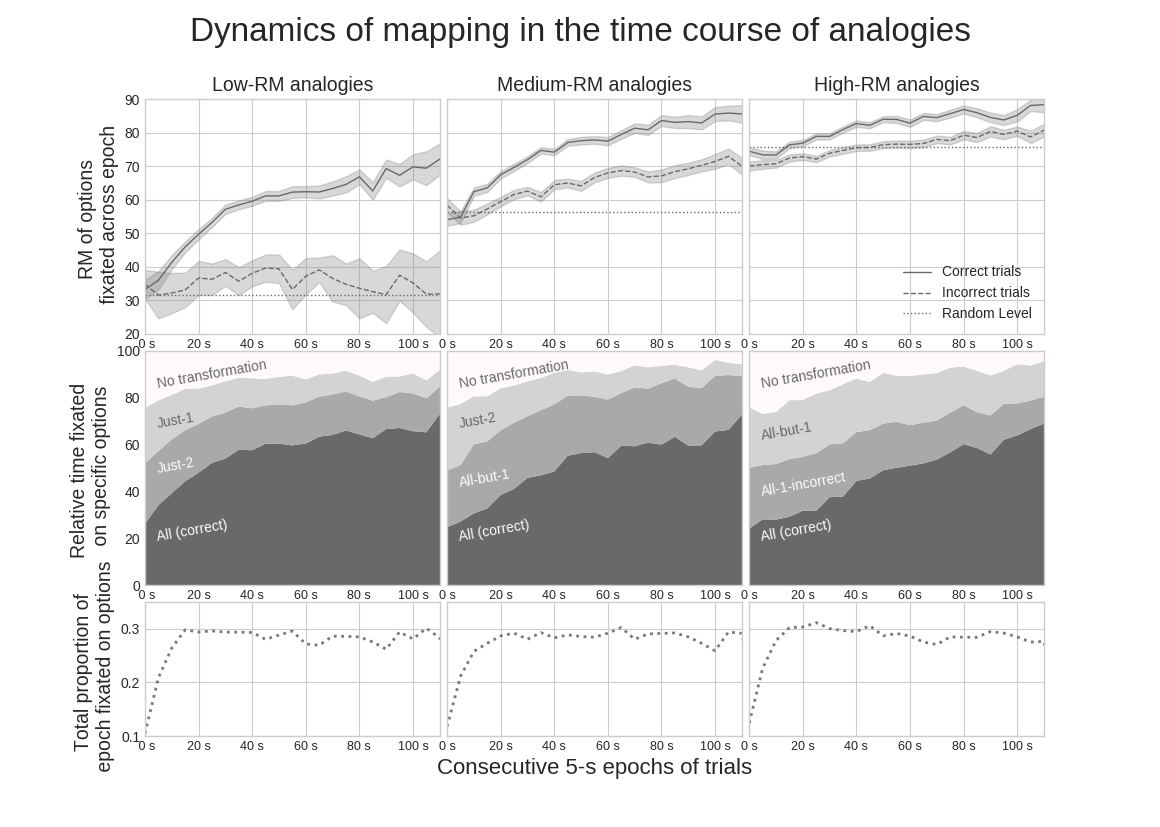

In [103]:
x_ticks = np.arange(0, (WINDOW_SIZE * corr_lev_easy.shape[0]), WINDOW_SIZE)
# Define a function for the line plot with intervals

# f, axes = plt.subplots(nrows=3, ncols=3, sharex=False, sharey=False, figsize= [ 11.6, 8.27])

# f.tight_layout()
# ax1 = axes[0, 0]
# ax2 = axes[0, 1]
# ax3 = axes[0, 2]
# ax4 = axes[1, 0]
# ax5 = axes[1, 1]
# ax6 = axes[1, 2]
# ax7 = axes[2, 0]
# ax8 = axes[2, 1]
# ax9 = axes[2, 2]

gs = gridspec.GridSpec(13, 3)
f = plt.figure(figsize= [ 11.6, 8.27])
ax1 = plt.subplot(gs[0:5, 0])
ax2 = plt.subplot(gs[0:5, 1])
ax3 = plt.subplot(gs[0:5, 2])
ax4 = plt.subplot(gs[5:10, 0])
ax5 = plt.subplot(gs[5:10, 1])
ax6 = plt.subplot(gs[5:10, 2])
ax7 = plt.subplot(gs[10:14, 0])
ax8 = plt.subplot(gs[10:14, 1])
ax9 = plt.subplot(gs[10:14, 2])

f.subplots_adjust(hspace=0.5, wspace=0.025)
# Plot the data, set the linewidth, color and transparency of the
# line, provide a label for the legend

ax1.plot(
    x_ticks,
    corr_lev_easy['AVG_RMx'],
    lw=1,
    color='dimgray',
    label='Correct trials')

# Shade the confidence interval
ax1.fill_between(
    x_ticks,
    corr_lev_easy['AVG_RMx_low_CI'],
    corr_lev_easy['AVG_RMx_high_CI'],
    color='gray',
    alpha=0.3)
ax1.plot(
    x_ticks,
    err_lev_easy['AVG_RMx'],
    '--',
    lw=1,
    color='dimgray',
    label='Incorrect trials')
# Shade the confidence interval

ax1.fill_between(
    x_ticks,
    err_lev_easy['AVG_RMx_low_CI'],
    err_lev_easy['AVG_RMx_high_CI'],
    color='gray',
    alpha=0.3)
# ax2 = plt.subplot(gs[6:11, 0])
ax1.plot(
    x_ticks,
    [31.5] * len(x_ticks),
    ":",
    lw=1,
    color='dimgray',
    label='Random Level')

ax1.set_title('Low-RM analogies', size=14)
ax1.tick_params(labelsize=10)
ax1.set_ylabel("RM of options \n fixated across epoch", multialignment='center', size=14)

ax2.plot(
    x_ticks,
    corr_lev_med['AVG_RMx'],
    lw=1,
    color='dimgray',
    label='Correct trials')

# Shade the confidence interval
ax2.fill_between(
    x_ticks,
    corr_lev_med['AVG_RMx_low_CI'],
    corr_lev_med['AVG_RMx_high_CI'],
    color='gray',
    alpha=0.3)

ax2.plot(
    x_ticks,
    err_lev_med['AVG_RMx'],
    '--',
    lw=1,
    color='dimgray',
    label='Incorrect trials')

ax2.plot(
    x_ticks,
    [56.5] * len(x_ticks),
    ":",
    lw=1,
    color='dimgray',
    label='Random Level')

# Shade the confidence interval
ax2.fill_between(
    x_ticks,
    err_lev_med['AVG_RMx_low_CI'],
    err_lev_med['AVG_RMx_high_CI'],
    color='gray',
    alpha=0.3)

ax2.set_title('Medium-RM analogies', size=14)
# Plot the data, set the linewidth, color and transparency of the
# line, provide a label for the legend

ax2.axes.yaxis.set_ticklabels([])

ax3.plot(
    x_ticks,
    corr_lev_hard['AVG_RMx'],
    lw=1,
    color='dimgray',
    label='Correct trials')

# Shade the confidence interval
ax3.fill_between(
    x_ticks,
    corr_lev_hard['AVG_RMx_low_CI'],
    corr_lev_hard['AVG_RMx_high_CI'],
    color='gray',
    alpha=0.3)

ax3.plot(
    x_ticks,
    err_lev_hard['AVG_RMx'],
    '--',
    lw=1,
    color='dimgray',
    label='Incorrect trials')
# Shade the confidence interval
ax3.fill_between(
    x_ticks,
    err_lev_hard['AVG_RMx_low_CI'],
    err_lev_hard['AVG_RMx_high_CI'],
    color='gray',
    alpha=0.3)

ax3.plot(
    x_ticks,
    [75.7] * len(x_ticks),
    ":",
    lw=1,
    color='dimgray',
    label='Random Level')
ax3.set_title('High-RM analogies', size=14)
ax3.axes.yaxis.set_ticklabels([])
color_map = ["dimgray", "darkgrey", "lightgray", "snow"]
ax4.stackplot(
    x_ticks,
    ans_type_res_easy['CORR'],
    ans_type_res_easy['SE'],
    ans_type_res_easy['BE'],
    ans_type_res_easy['CON'],
    labels=['CORR', 'SE', 'BE', 'CON'],
    colors=color_map)
ax4.margins(0.0)

ax5.stackplot(
    x_ticks,
    ans_type_res_med['CORR'],
    ans_type_res_med['SE'],
    ans_type_res_med['BE'],
    ans_type_res_med['CON'],
    labels=['CORR', 'SE', 'BE', 'CON'],
    colors=color_map)
ax5.margins(0.0)
ax5.axes.yaxis.set_ticklabels([])

ax6.stackplot(
    x_ticks,
    ans_type_res_hard['CORR'],
    ans_type_res_hard['SE'],
    ans_type_res_hard['BE'],
    ans_type_res_hard['CON'],
    labels=['CORR', 'SE', 'BE', 'CON'],
    colors=color_map)
ax6.margins(0.0)
ax6.axes.yaxis.set_ticklabels([])

ax7.plot(
    x_ticks,
    full_wmc_low['FOX_aggregated'],
    ':',
    lw=2,
    color='dimgray',
    alpha=0.9,
    label='Relative time on options')

ax8.plot(
    x_ticks,
    full_wmc_med['FOX_aggregated'],
    ':',
    lw=2,
    color='dimgray',
    alpha=0.9,
    label='Relative time on options')
ax8.axes.yaxis.set_ticklabels([])

ax9.plot(
    x_ticks,
    full_wmc_high['FOX_aggregated'],
    ':',
    lw=2,
    color='dimgray',
    alpha=0.9,
    label='Relative time on options')
ax9.axes.yaxis.set_ticklabels([])

# Label the axes and provide a title
ax4.text(4, 84, 'No transformation', color='dimgray', rotation=10)
ax4.text(4, 67, 'Just-1', color='dimgray', rotation=10)
ax4.text(4, 48, 'Just-2', color='snow', rotation=10)
ax4.text(4, 19, 'All (correct)', color='snow', rotation=10)

ax4.set_ylabel("Relative time fixated \n on specific options", size=14, multialignment='center')
ax5.text(4, 84, 'No transformation', color='dimgray', rotation=10)
ax5.text(4, 67, 'Just-2', color='dimgray', rotation=10)
ax5.text(4, 42, 'All-but-1', color='snow', rotation=10)
ax5.text(4, 19, 'All (correct)', color='snow', rotation=10)

ax6.xaxis.set_label_coords(-0.1, -0.08)
ax6.yaxis.labelpad = 15
ax6.yaxis.set_label_position("right")
ax6.text(4, 84, 'No transformation', color='dimgray', rotation=10)
ax6.text(4, 62, 'All-but-1', color='dimgray', rotation=10)
ax6.text(4, 38, 'All-1-incorrect', color='snow', rotation=10)
ax6.text(4, 19, 'All (correct)', color='snow', rotation=10)
ax6.tick_params(labelsize=10)

ax7.set_ylabel("Total proportion of \n epoch fixated on options", multialignment='center', size=14)
ax8.set_xlabel('Consecutive 5-s epochs of trials', {'size': 16})

ax1.set_xticks(range(0, 111, 20))
ax1.set_xticklabels([' 0 s', '20 s', '40 s', '60 s', '80 s', '100 s'], size=9)

ax2.set_xticks(range(0, 111, 20))
ax2.set_xticklabels(['0 s', '20 s', '40 s', '60 s', '80 s', '100 s'], size=9)
ax3.set_xticks(range(0, 111, 20))
ax3.set_xticklabels(['0 s', '20 s', '40 s', '60 s', '80 s', '100 s'], size=9)

ax4.set_xticks(range(0, 111, 20))
ax4.set_xticklabels([' 0 s', '20 s', '40 s', '60 s', '80 s', '100 s'], size=9)

ax5.set_xticks(range(0, 111, 20))
ax5.set_xticklabels(['0 s', '20 s', '40 s', '60 s', '80 s', '100 s'], size=9)

ax6.set_xticks(range(0, 111, 20))
ax6.set_xticklabels(['0 s', '20 s', '40 s', '60 s', '80 s', '100 s'], size=9)

ax7.set_xticks(range(0, 111, 20))
ax7.set_xticklabels([' 0 s', '20 s', '40 s', '60 s', '80 s', '100 s'], size=9)

ax8.set_xticks(range(0, 111, 20))
ax8.set_xticklabels(['0 s', '20 s', '40 s', '60 s', '80 s', '100 s'], size=9)

ax9.set_xticks(range(0, 111, 20))
ax9.set_xticklabels(['0 s', '20 s', '40 s', '60 s', '80 s', '100 s'], size=9)

ax1.set_yticks(range(20,91,10))
ax2.set_yticks(range(20,91,10))
ax3.set_yticks(range(20,91,10))

# ax1.set_yticklabels(fontsize=9)

ax1.set_xlim([0, 110])
ax2.set_xlim([0, 110])
ax3.set_xlim([0, 110])
ax4.set_xlim([0, 110])
ax5.set_xlim([0, 110])
ax6.set_xlim([0, 110])
ax7.set_xlim([0, 110])
ax8.set_xlim([0, 110])
ax9.set_xlim([0, 110])

ax1.set_ylim([20, 90])
ax2.set_ylim([20, 90])
ax3.set_ylim([20, 90])
ax4.set_ylim([0, 100])
ax5.set_ylim([0, 100])
ax6.set_ylim([0, 100])
ax7.set_ylim([0.1, 0.35])
ax8.set_ylim([0.1, 0.35])
ax9.set_ylim([0.1, 0.35])

# Display legend
# ax1.legend(loc='upper left', fontsize=10)
# ax2.legend(loc='upper left', fontsize=10)
ax3.legend(loc='lower right', fontsize=10)


f.suptitle('Dynamics of mapping in the time course of analogies', size=24)
# ax1.legend(loc = 'best')
f.savefig('FIGURE8.png')

In [8]:
# Dynamics of processing in the time course of Figural Analogy trials as a function of working memory capacity

In [8]:
corr_wmc_low['PROP_PSOx'].plot()
plt.show()

<IPython.core.display.Javascript object>


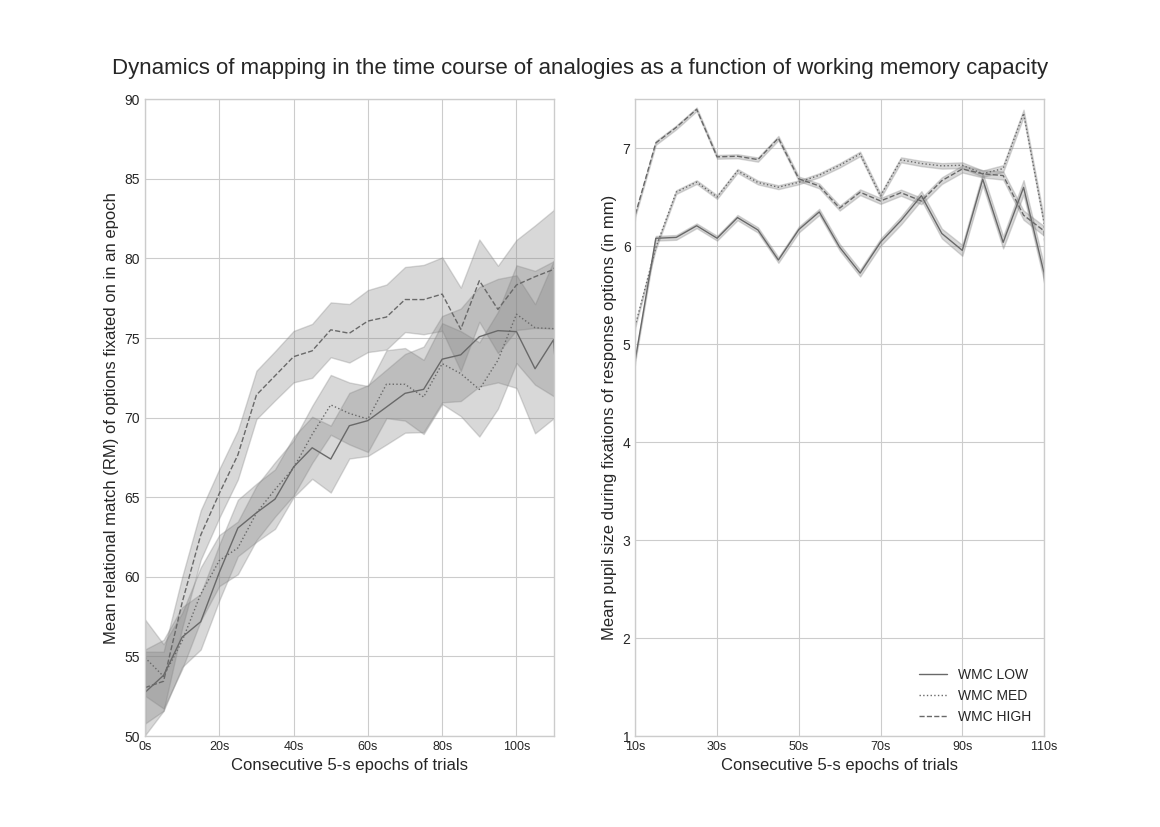

In [9]:
x_ticks = np.arange(0, (WINDOW_SIZE * corr_lev_easy.shape[0]), WINDOW_SIZE)
f, (ax1, ax2) = plt.subplots(1, 2, figsize= [ 11.6, 8.27])
# f.tight_layout()

ax1.plot(
    x_ticks,
    full_wmc_low['AVG_RMx'],
    lw=1,
    color='dimgray',
    label='WMC LOW')

ax1.fill_between(
    x_ticks,
    full_wmc_low['AVG_RMx_low_CI'],
    full_wmc_low['AVG_RMx_high_CI'],
    color='gray',
    alpha=0.3)

ax1.plot(
    x_ticks,
    full_wmc_med['AVG_RMx'], ':',
    lw=1,
    color='dimgray',
    label='WMC MED')

ax1.fill_between(
    x_ticks,
    full_wmc_med['AVG_RMx_low_CI'],
    full_wmc_med['AVG_RMx_high_CI'],
    color='gray',
    alpha=0.3)

ax1.plot(
    x_ticks,
    full_wmc_high['AVG_RMx'],
    '--',
    lw=1,
    color='dimgray',
    label='WMC HIGH')

ax1.fill_between(
    x_ticks,
    full_wmc_high['AVG_RMx_low_CI'],
    full_wmc_high['AVG_RMx_high_CI'],
    color='gray',
    alpha=0.3)

ax2.plot(x_ticks, full_wmc_low['PROP_PSOx'] ,label = 'WMC LOW', lw=1, color = 'dimgray')

ax2.fill_between(
    x_ticks,
    full_wmc_low['PROP_PSOx_low_CI'],
    full_wmc_low['PROP_PSOx_high_CI'],
    color='gray',
    alpha=0.3)

ax2.plot(x_ticks, full_wmc_med['PROP_PSOx'],':' , label = 'WMC MED', lw = 1, color = 'dimgray')

ax2.fill_between(
    x_ticks,
    full_wmc_med['PROP_PSOx_low_CI'],
    full_wmc_med['PROP_PSOx_high_CI'],
    color='gray',
    alpha=0.3)

ax2.plot(x_ticks, full_wmc_high['PROP_PSOx'], '--', lw=1, label='WMC HIGH', color = 'dimgray')

ax2.fill_between(
    x_ticks,
    full_wmc_high['PROP_PSOx_low_CI'],
    full_wmc_high['PROP_PSOx_high_CI'],
    color='gray',
    alpha=0.3)


ax1.set_xlim([0, 110])
ax1.set_ylim([50, 90])

ax2.set_xlim([10, 110])
ax2.set_ylim([1, 7.5])
# ax2.set_xticks([10, 30, 50, 70, 90, 110])

ax1.set_ylabel('Mean relational match (RM) of options fixated on in an epoch', size=12)
ax2.set_ylabel('Mean pupil size during fixations of response options (in mm)', size=12)

ax1.set_xticks(range(0, 111, 20))
ax1.set_xticklabels(['0s', '20s', '40s', '60s', '80s', '100s'], size=9)
ax2.set_xticks(range(10, 111, 20))
ax2.set_xticklabels(['10s', '30s', '50s', '70s', '90s', '110s'], size=9)

ax1.set_xlabel('Consecutive 5-s epochs of trials', {'size': 12})
ax2.set_xlabel('Consecutive 5-s epochs of trials', {'size': 12})
ax2.legend(loc = 'lower right')
f.suptitle("Dynamics of mapping in the time course of analogies as a function of working memory capacity", x = 0.5, y = 0.93, size=16)
f.savefig('FAN_WMC_Kx.png')

<IPython.core.display.Javascript object>


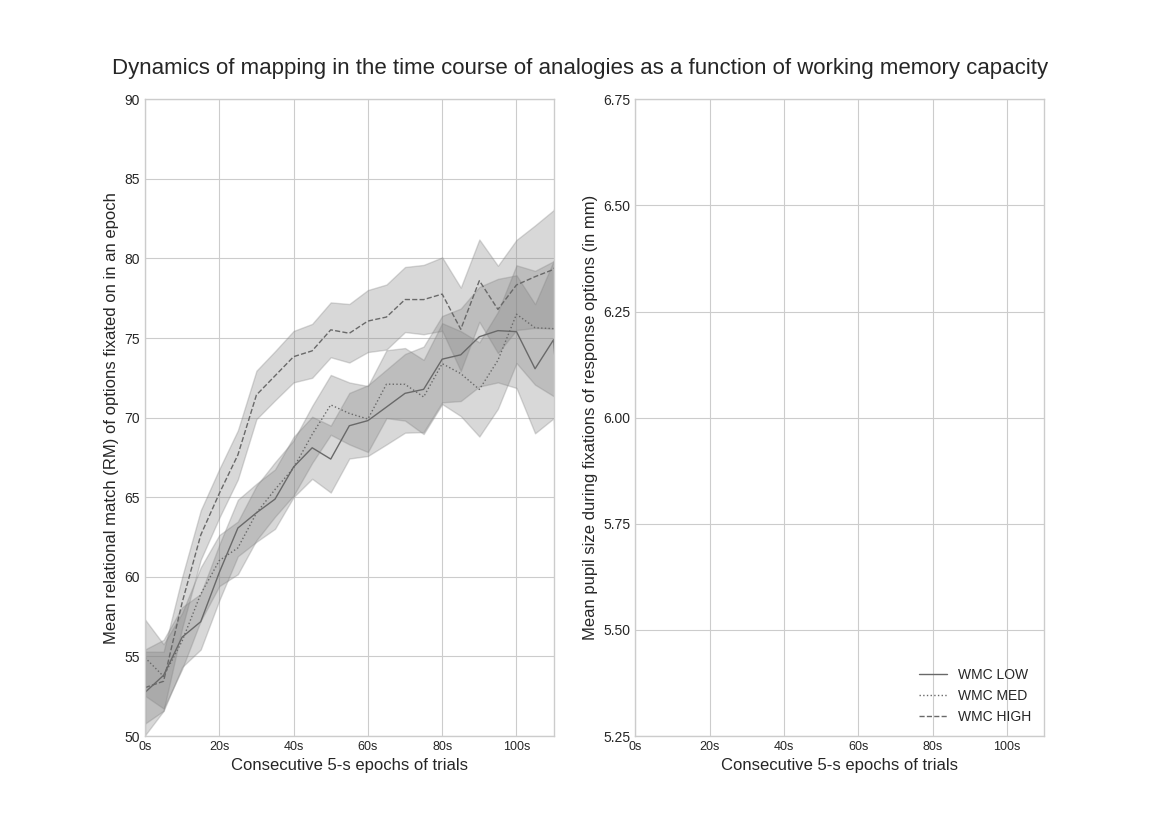

In [10]:
x_ticks = np.arange(0, (WINDOW_SIZE * corr_lev_easy.shape[0]), WINDOW_SIZE)
f, (ax1, ax2) = plt.subplots(1, 2, figsize= [ 11.6, 8.27])
# f.tight_layout(w_pad = 1.6, h_pad = 2)
ax1.plot(
    x_ticks,
    full_wmc_low['AVG_RMx'],
    lw=1,
    color='dimgray',
    label='WMC LOW')

ax1.fill_between(
    x_ticks,
    full_wmc_low['AVG_RMx_low_CI'],
    full_wmc_low['AVG_RMx_high_CI'],
    color='gray',
    alpha=0.3)

ax1.plot(
    x_ticks,
    full_wmc_med['AVG_RMx'], ':',
    lw=1,
    color='dimgray',
    label='WMC MED')

ax1.fill_between(
    x_ticks,
    full_wmc_med['AVG_RMx_low_CI'],
    full_wmc_med['AVG_RMx_high_CI'],
    color='gray',
    alpha=0.3)

ax1.plot(
    x_ticks,
    full_wmc_high['AVG_RMx'],
    '--',
    lw=1,
    color='dimgray',
    label='WMC HIGH')

ax1.fill_between(
    x_ticks,
    full_wmc_high['AVG_RMx_low_CI'],
    full_wmc_high['AVG_RMx_high_CI'],
    color='gray',
    alpha=0.3)

ax2.plot(x_ticks, full_wmc_low['PSOx_mean'] ,label = 'WMC LOW', lw=1, color = 'dimgray')

ax2.fill_between(
    x_ticks,
    full_wmc_low['PSOx_mean_low_CI'],
    full_wmc_low['PSOx_mean_high_CI'],
    color='gray',
    alpha=0.3)

ax2.plot(x_ticks, full_wmc_med['PSOx_mean'],':' , label = 'WMC MED', lw = 1, color = 'dimgray')

ax2.fill_between(
    x_ticks,
    full_wmc_med['PSOx_mean_low_CI'],
    full_wmc_med['PSOx_mean_high_CI'],
    color='gray',
    alpha=0.3)

ax2.plot(x_ticks, full_wmc_high['PSOx_mean'], '--', lw=1, label='WMC HIGH', color = 'dimgray')

ax2.fill_between(
    x_ticks,
    full_wmc_high['PSOx_mean_low_CI'],
    full_wmc_high['PSOx_mean_high_CI'],
    color='gray',
    alpha=0.3)


ax1.set_xlim([0, 110])
ax1.set_ylim([50, 90])

ax2.set_xlim([0, 110])
ax2.set_ylim([5.25, 6.75])
ax2.set_yticks(np.arange(5.25, 6.99, 0.25))
# ax2.set_xticks([10, 30, 50, 70, 90, 110])

ax1.set_ylabel('Mean relational match (RM) of options fixated on in an epoch', size=12)
ax2.set_ylabel('Mean pupil size during fixations of response options (in mm)', size=12)

ax1.set_xticks(range(0, 111, 20))
ax1.set_xticklabels(['0s', '20s', '40s', '60s', '80s', '100s'], size=9)
ax2.set_xticks(range(0, 111, 20))
ax2.set_xticklabels(['0s', '20s', '40s', '60s', '80s', '100s'], size=9)

ax1.set_xlabel('Consecutive 5-s epochs of trials', {'size': 12})
ax2.set_xlabel('Consecutive 5-s epochs of trials', {'size': 12})
ax2.legend(loc = 'lower right')
f.suptitle("Dynamics of mapping in the time course of analogies as a function of working memory capacity", x = 0.5, y = 0.93, size=16)

f.savefig('FAN_WMC_mean.png')

In [11]:
# correlations

In [12]:
corrs = pd.DataFrame()

corrs['EPOCH NO'] = np.arange(24)
corrs['LEVEL EASY CORR '] = corr_lev_easy['AVG_RMx'] 
corrs['LEVEL MED CORR'] = corr_lev_med['AVG_RMx'] 
corrs['LEVEL HARD CORR'] = corr_lev_hard['AVG_RMx'] 

corrs['LEVEL EASY ERR'] = err_lev_easy['AVG_RMx']
corrs['LEVEL MED ERR'] = err_lev_med['AVG_RMx'] 
corrs['LEV HARD ERR '] = err_lev_hard['AVG_RMx'] 


In [13]:
corrs.corr()['EPOCH NO']

EPOCH NO            1.000000
LEVEL EASY CORR     0.906913
LEVEL MED CORR      0.937116
LEVEL HARD CORR     0.922148
LEVEL EASY ERR     -0.299406
LEVEL MED ERR       0.879590
LEV HARD ERR        0.976542
Name: EPOCH NO, dtype: float64

In [14]:
corrs

,EPOCH NO,LEVEL EASY CORR,LEVEL MED CORR,LEVEL HARD CORR,LEVEL EASY ERR,LEVEL MED ERR,LEV HARD ERR
0,0,33.242818,54.067218,74.485045,34.774120,58.395868,70.097460
1,1,35.976118,54.789494,73.412467,31.576321,54.559420,70.508096
2,2,41.355861,62.430528,73.367646,32.176790,55.222459,70.733073
3,3,45.958788,63.569648,76.374956,33.116923,57.301165,72.448981
4,4,49.709440,67.475980,76.893795,36.675605,59.476060,72.892145
5,5,53.245743,69.665697,78.927329,36.276143,61.586542,72.144699
6,6,57.164836,71.987066,78.917057,38.315449,62.602120,73.888032
7,7,58.474980,74.736673,80.969150,35.699425,60.878317,74.732180
8,8,59.556179,74.205318,82.743363,38.078059,64.501094,75.535856
9,9,61.160449,77.113929,82.230073,39.610079,64.982846,75.600411
